In [11]:
from fetch_data import load_data, WEATHER_DATA_DIR, get_fname, plot_data
import json


In [20]:
location='KGS_start'
delta_x=10000
delta_y=10000
n_x=10
n_y=10
variables=['temp', 'wind', 'clouds']

fname = get_fname(location, delta_x, delta_y, n_x, n_y, 'json')
with open(WEATHER_DATA_DIR.joinpath(fname), 'r') as handle:
    raw_data = json.load(handle)

n_x = raw_data['n_x']
n_y = raw_data['n_y']
location = raw_data['location']

data = dict()

variables.append('indices')

for v in variables:
    v_value = []
    for i in range(n_x):
        tmp_l = []
        for j in range(n_y):
            if v == 'indices':
                tmp_l.append([i, j])
            else:
                key = f'{location}-{i}_{j}'
                if v == 'temp':
                    tmp_l.append(raw_data[key]['main']['temp'])
                elif v == 'wind':
                    tmp_l.append(raw_data[key]['wind']['speed'])
                elif v == 'clouds':
                    tmp_l.append(raw_data[key]['clouds']['all'])
        v_value.append(tmp_l)
    data.update({v: v_value})

In [6]:
from owm import get_own_data

In [ ]:
get_own_data(-71.059769, 42.358429)
# BOSTON: -71.059769, 42.358429
# CAMBRIDGE: -71.105614, 42.375099

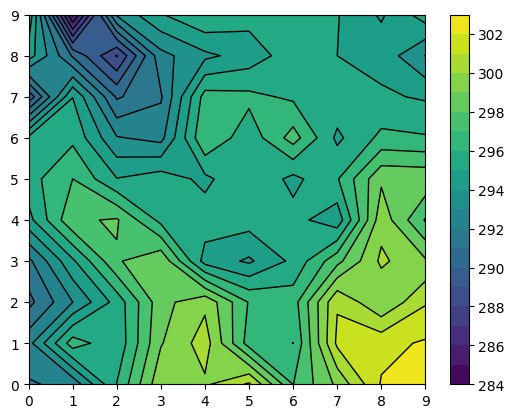

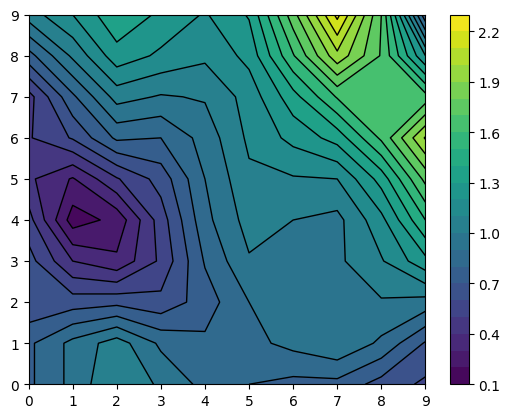

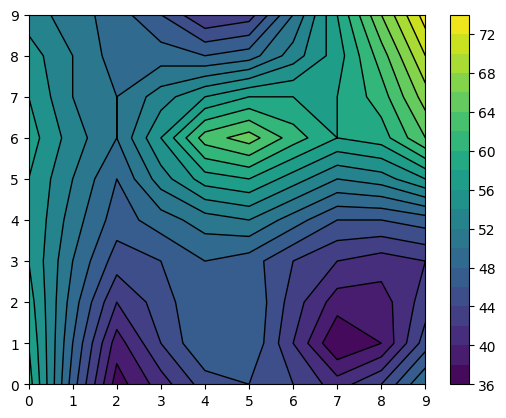

In [21]:
plot_data(data['temp'])
plot_data(data['wind'])
plot_data(data['clouds'])